In [15]:
from fastai.vision.all import *
from fastai.callback.tensorboard import TensorBoardCallback
from pathlib import Path

In [16]:
# Get the path to data for training/testing
path = untar_data(URLs.FOOD)
path.ls()

(#8) [Path('/root/.fastai/data/food-101/train.json'),Path('/root/.fastai/data/food-101/test.txt'),Path('/root/.fastai/data/food-101/classes.txt'),Path('/root/.fastai/data/food-101/images'),Path('/root/.fastai/data/food-101/h5'),Path('/root/.fastai/data/food-101/test.json'),Path('/root/.fastai/data/food-101/labels.txt'),Path('/root/.fastai/data/food-101/train.txt')]

In [17]:
# load training data datframe
df_train=pd.read_json(path/'train.json')
df_train.head()

,churros,hot_and_sour_soup,samosa,sashimi,pork_chop,spring_rolls,panna_cotta,beef_tartare,greek_salad,foie_gras,...,chicken_quesadilla,pho,prime_rib,cheesecake,ice_cream,omelette,grilled_cheese_sandwich,lobster_roll_sandwich,nachos,oysters
0,churros/1004234,hot_and_sour_soup/1002782,samosa/1008131,sashimi/1001239,pork_chop/1000802,spring_rolls/1002160,panna_cotta/1001332,beef_tartare/1000431,greek_salad/1007149,foie_gras/1004944,...,chicken_quesadilla/1004279,pho/1005681,prime_rib/1001089,cheesecake/1001446,ice_cream/1012277,omelette/1001719,grilled_cheese_sandwich/1003153,lobster_roll_sandwich/100009,nachos/100284,oysters/1008124
1,churros/1013460,hot_and_sour_soup/1003688,samosa/1011601,sashimi/1001363,pork_chop/1006233,spring_rolls/1003056,panna_cotta/1003460,beef_tartare/1005746,greek_salad/1009138,foie_gras/1008577,...,chicken_quesadilla/1009225,pho/1011443,prime_rib/1006320,cheesecake/1004515,ice_cream/101858,omelette/1007843,grilled_cheese_sandwich/10060,lobster_roll_sandwich/1001432,nachos/1009513,oysters/1016229
2,churros/1016791,hot_and_sour_soup/1008185,samosa/101365,sashimi/1002556,pork_chop/1019530,spring_rolls/1003507,panna_cotta/1011097,beef_tartare/1009672,greek_salad/1010520,foie_gras/1011711,...,chicken_quesadilla/1011413,pho/1012513,prime_rib/100945,cheesecake/1004807,ice_cream/102595,omelette/1015300,grilled_cheese_sandwich/1007544,lobster_roll_sandwich/100646,nachos/1011394,oysters/1023832
3,churros/102100,hot_and_sour_soup/1008701,samosa/1015943,sashimi/1007253,pork_chop/1019569,spring_rolls/1008736,panna_cotta/1013000,beef_tartare/1012128,greek_salad/1011665,foie_gras/1017233,...,chicken_quesadilla/1023828,pho/1019401,prime_rib/10120,cheesecake/1017408,ice_cream/1044117,omelette/1029915,grilled_cheese_sandwich/1013343,lobster_roll_sandwich/100655,nachos/1013641,oysters/103236
4,churros/1025494,hot_and_sour_soup/1008924,samosa/1016296,sashimi/1010510,pork_chop/1025391,spring_rolls/1012525,panna_cotta/1020036,beef_tartare/1027680,greek_salad/1012989,foie_gras/1023512,...,chicken_quesadilla/1024740,pho/1021371,prime_rib/1016126,cheesecake/1021942,ice_cream/104465,omelette/1038109,grilled_cheese_sandwich/1016030,lobster_roll_sandwich/100702,nachos/1014846,oysters/1038150


In [18]:
# Melt the dataframe to get two columns of the image and associated lable
melted_df_train = df_train.melt(var_name='labels', value_name='filename')
melted_df_train['filename'] = melted_df_train['filename'] + '.jpg'
melted_df_train.head()

,labels,filename
0,churros,churros/1004234.jpg
1,churros,churros/1013460.jpg
2,churros,churros/1016791.jpg
3,churros,churros/102100.jpg
4,churros,churros/1025494.jpg


In [19]:
# Read in test data
df_test=pd.read_json(path/'test.json')
df_test.head()

,churros,hot_and_sour_soup,samosa,sashimi,pork_chop,spring_rolls,panna_cotta,beef_tartare,greek_salad,foie_gras,...,chicken_quesadilla,pho,prime_rib,cheesecake,ice_cream,omelette,grilled_cheese_sandwich,lobster_roll_sandwich,nachos,oysters
0,churros/1061830,hot_and_sour_soup/1000486,samosa/1009326,sashimi/100113,pork_chop/1012227,spring_rolls/1005480,panna_cotta/1006650,beef_tartare/101073,greek_salad/1010850,foie_gras/1007306,...,chicken_quesadilla/10257,pho/1002382,prime_rib/1006976,cheesecake/1023543,ice_cream/1004744,omelette/1019294,grilled_cheese_sandwich/1000938,lobster_roll_sandwich/1002698,nachos/1011831,oysters/1005672
1,churros/1064042,hot_and_sour_soup/1004564,samosa/1024186,sashimi/1017182,pork_chop/1019077,spring_rolls/103010,panna_cotta/1027460,beef_tartare/1029120,greek_salad/1029680,foie_gras/1044237,...,chicken_quesadilla/1030292,pho/1020153,prime_rib/102197,cheesecake/102854,ice_cream/1031536,omelette/1058816,grilled_cheese_sandwich/1003050,lobster_roll_sandwich/1029665,nachos/101954,oysters/1017801
2,churros/1074903,hot_and_sour_soup/1011278,samosa/1036216,sashimi/1043094,pork_chop/102958,spring_rolls/1036175,panna_cotta/1030883,beef_tartare/1030025,greek_salad/1053670,foie_gras/1073688,...,chicken_quesadilla/1052529,pho/1026354,prime_rib/102813,cheesecake/1073148,ice_cream/1075106,omelette/1116874,grilled_cheese_sandwich/1005927,lobster_roll_sandwich/103891,nachos/103312,oysters/1019666
3,churros/1085259,hot_and_sour_soup/1029400,samosa/103689,sashimi/1050391,pork_chop/1040432,spring_rolls/1044858,panna_cotta/103712,beef_tartare/1031053,greek_salad/1062715,foie_gras/1113614,...,chicken_quesadilla/1096804,pho/1028507,prime_rib/1035695,cheesecake/1092082,ice_cream/1100243,omelette/1122818,grilled_cheese_sandwich/100694,lobster_roll_sandwich/104300,nachos/1044020,oysters/1040557
4,churros/1097261,hot_and_sour_soup/1044215,samosa/1052427,sashimi/10551,pork_chop/1045605,spring_rolls/1067952,panna_cotta/1050629,beef_tartare/1066933,greek_salad/1101710,foie_gras/1125178,...,chicken_quesadilla/1102036,pho/1029709,prime_rib/105375,cheesecake/1096018,ice_cream/1106165,omelette/1145379,grilled_cheese_sandwich/1052563,lobster_roll_sandwich/1046809,nachos/1060157,oysters/1044823


In [20]:
# Create a datablock, pass in df params
food = DataBlock(blocks=(ImageBlock, MultiCategoryBlock),
                   splitter=RandomSplitter(),
                   get_x=ColReader('filename', pref=str(path/'images') + os.path.sep),
                   get_y=ColReader('labels', label_delim=' '),
                   item_tfms = Resize(460),
                   batch_tfms=aug_transforms(size=224))



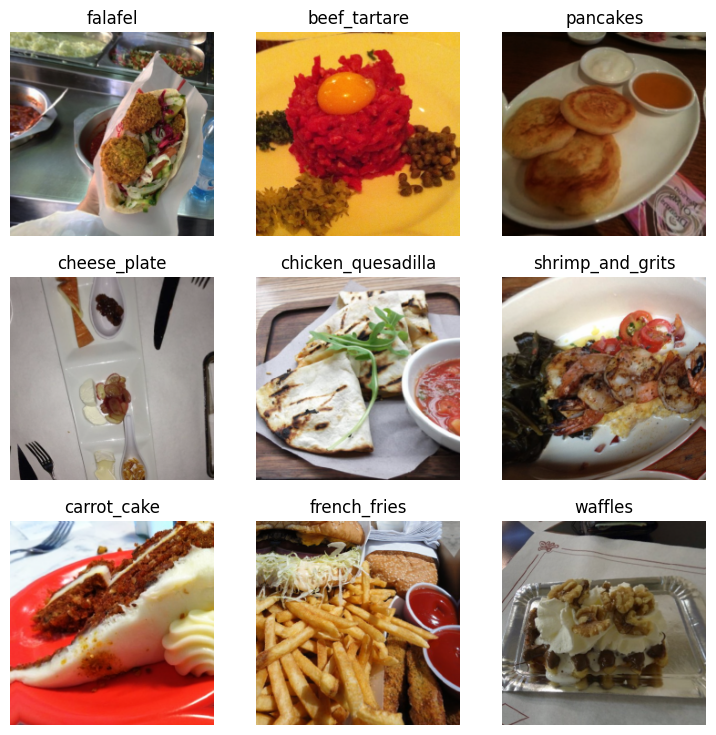

In [21]:
# Pass df to datablock
dls = food.dataloaders(melted_df_train)
dls.show_batch(max_n=9)

In [22]:
# Accuracy for multilabel classification, data currently only has single labels
f1_macro = F1ScoreMulti(thresh=0.5, average='macro')
f1_macro.name = 'F1(macro)'
f1_samples = F1ScoreMulti(thresh=0.5, average='samples')
f1_samples.name = 'F1(samples)'

In [23]:
# Set up training parameter/configuration
model_type_dict = {'resnet18':resnet18, 'resnet34':resnet34, 'resnet50':resnet50}
model_type = 'resnet50'
batch_size = 64 # fastai default

learn = vision_learner(dls, model_type_dict[model_type], metrics=[partial(accuracy_multi, thresh=0.5), f1_macro, f1_samples])

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 109MB/s]


SuggestedLRs(valley=0.004365158267319202)

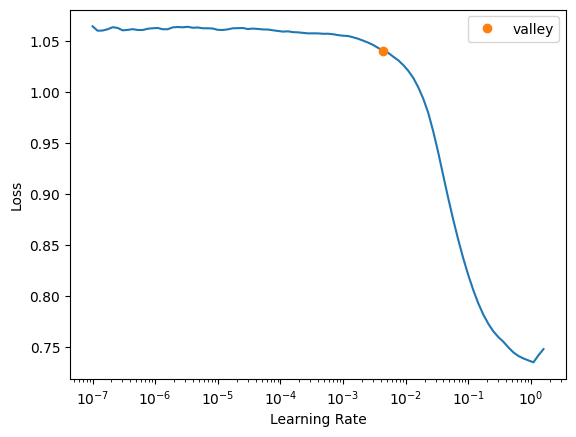

In [24]:
# Plot graph to help choose learning rate
learn.lr_find()

In [27]:
# Specify organisation of experiment logging/results and model save location

lr = 0.04
epochs = 2

experiment_name = f"{model_type}_lr_{lr}_bs_{batch_size}_epochs_{epochs}"

base_dir = Path('food_logs')
# Specific experiment directory
exp_dir = base_dir / experiment_name

# Create directories if they don't exist
exp_dir.mkdir(parents=True, exist_ok=True)

# Directory for saving the model
model_save_dir = exp_dir / 'models'
model_save_dir.mkdir(exist_ok=True)



cbs = [TensorBoardCallback(log_dir=exp_dir, projector=True)]

In [28]:
learn.fine_tune(epochs, lr)

epoch,train_loss,valid_loss,accuracy_multi,F1(macro),F1(samples),time
0,0.035046,0.025996,0.992925,0.450641,0.356121,15:20


epoch,train_loss,valid_loss,accuracy_multi,F1(macro),F1(samples),time
0,0.025267,0.021237,0.993765,0.534375,0.428020,16:01
1,0.015750,0.013246,0.995952,0.752948,0.663388,15:42


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


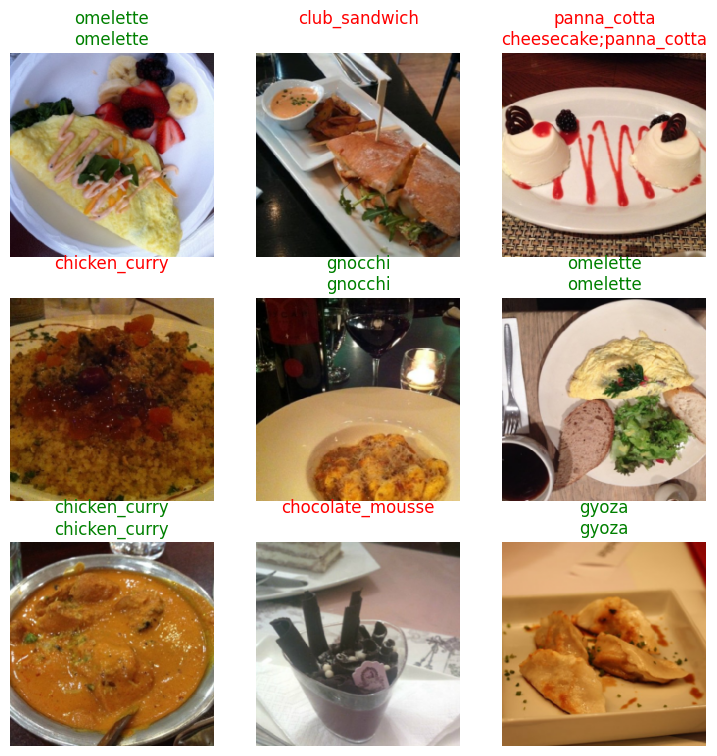

In [29]:
learn.show_results()

In [30]:
# Save the model as .pkl
learn.export(model_save_dir / f'{experiment_name}.pkl')

In [31]:
# Save the model as .pth
torch.save(learn.model.state_dict(), model_save_dir / f'{experiment_name}.pth')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


,target,predicted,probabilities,loss
0,red_velvet_cake,macarons,"tensor([2.0600e-10, 2.8448e-15, 1.8776e-10, 3.8763e-15, 7.2698e-13, 7.3872e-11,\n 8.8232e-11, 2.1146e-13, 6.2404e-14, 6.5729e-12, 4.8684e-13, 1.5166e-13,\n 2.6631e-12, 7.6400e-09, 3.2047e-11, 7.2855e-13, 3.7014e-14, 8.2416e-12,\n 5.0771e-13, 2.5371e-13, 6.6137e-13, 3.0842e-09, 1.3436e-10, 7.2905e-11,\n 1.9187e-11, 2.2940e-10, 5.4488e-14, 5.1817e-13, 2.1236e-14, 5.4173e-09,\n 4.1672e-11, 1.4864e-10, 5.1130e-12, 1.3473e-09, 4.5424e-13, 7.2640e-10,\n 2.3105e-10, 8.2940e-13, 7.6819e-16, 2.4317e-10, 1.1372e-11, 3.9049e-13,\n 1.5281e-14, 1.4608e-13, 2.3072e-12, 1.0262e-11, 3.5669e-11, 5.2205e-12,\n 1.9082e-11, 3.4411e-11, 4.8920e-13, 4.2905e-12, 5.6550e-16, 1.5192e-09,\n 1.0302e-15, 9.2027e-11, 1.9411e-16, 7.4149e-12, 2.5667e-08, 6.4551e-13,\n 1.0641e-10, 1.6027e-12, 7.8437e-14, 9.9989e-01, 4.0216e-12, 8.4628e-13,\n 9.4732e-16, 3.6984e-12, 2.4555e-12, 9.8457e-14, 2.4704e-11, 7.3147e-14,\n 6.6018e-12, 1.4681e-11, 2.7992e-13, 2.7509e-12, 5.3076e-14, 5.9919e-15,\n 2.1042e-17, 1.8883e-13, 6.0346e-11, 3.5357e-13, 4.1791e-13, 3.3595e-09,\n 5.2957e-15, 2.0628e-11, 5.5368e-10, 2.7562e-12, 5.0132e-10, 5.9138e-16,\n 2.9237e-13, 5.9670e-13, 1.3688e-11, 1.2633e-11, 6.0429e-12, 1.9124e-08,\n 2.4434e-12, 7.6330e-11, 3.1673e-10, 1.7377e-11, 8.8768e-13])",0.2834537625312805
1,macaroni_and_cheese,falafel,"tensor([9.3422e-08, 2.4929e-07, 9.6601e-09, 2.3866e-05, 3.8269e-04, 4.7761e-05,\n 2.7490e-06, 1.7526e-05, 1.4267e-06, 1.3055e-05, 1.2071e-01, 2.1638e-06,\n 4.2892e-07, 1.6332e-03, 6.3699e-04, 4.2844e-07, 1.4893e-06, 6.0158e-07,\n 6.4380e-07, 4.5021e-06, 2.2433e-05, 2.1040e-06, 2.8852e-06, 7.2954e-08,\n 4.2648e-06, 1.5127e-04, 1.7195e-02, 8.1078e-08, 9.6440e-04, 2.5153e-04,\n 7.2397e-06, 7.7590e-05, 6.4699e-07, 5.2496e-09, 5.9058e-04, 2.2072e-06,\n 9.8047e-01, 1.3827e-04, 1.5525e-07, 1.9194e-06, 1.4508e-06, 2.2576e-08,\n 2.0895e-05, 2.5762e-06, 1.3734e-06, 3.4811e-07, 7.9991e-06, 3.9667e-07,\n 1.9340e-04, 1.3510e-04, 2.9702e-07, 2.9413e-07, 2.6571e-08, 4.5303e-03,\n 3.2701e-09, 1.4514e-06, 4.3475e-05, 2.6230e-07, 1.3437e-06, 2.0030e-06,\n 1.1861e-07, 4.7849e-06, 8.4746e-08, 4.6570e-07, 2.8368e-09, 2.3518e-06,\n 1.9649e-05, 1.9329e-05, 7.7880e-06, 2.8583e-06, 7.3841e-09, 2.8440e-07,\n 7.5050e-07, 1.9041e-07, 1.6556e-08, 1.1847e-07, 1.2856e-07, 4.4939e-06,\n 9.1962e-08, 2.0924e-05, 4.4382e-05, 3.6975e-08, 1.1412e-06, 6.8640e-06,\n 4.1151e-08, 2.1880e-06, 3.1028e-07, 4.9727e-06, 1.6304e-06, 5.5011e-07,\n 2.2660e-06, 4.7999e-09, 2.3632e-06, 5.8607e-05, 1.9083e-04, 1.4234e-05,\n 8.3268e-05, 4.8207e-05, 6.1045e-07, 1.6767e-05, 5.3666e-07])",0.20174014568328857
2,tiramisu,bruschetta,"tensor([8.7468e-08, 5.5178e-07, 1.5150e-08, 1.3002e-04, 3.9534e-04, 2.2441e-05,\n 7.9236e-08, 3.8692e-08, 2.3202e-07, 1.0781e-02, 6.7476e-01, 3.3306e-07,\n 1.2325e-07, 4.8977e-05, 5.0787e-07, 1.7016e-02, 5.1356e-06, 1.2709e-07,\n 4.2716e-06, 1.5846e-03, 1.8165e-07, 9.0324e-08, 4.8955e-07, 2.5975e-09,\n 8.5321e-07, 1.5736e-05, 2.6355e-05, 2.0184e-07, 2.5616e-06, 4.5449e-07,\n 6.2193e-05, 6.8386e-07, 3.3350e-06, 4.9061e-09, 1.5338e-05, 4.6078e-07,\n 4.7045e-03, 9.9985e-06, 3.5558e-08, 5.6760e-06, 6.4216e-08, 5.8170e-09,\n 1.1712e-07, 1.3381e-07, 1.3986e-06, 7.0388e-07, 1.7760e-06, 2.8223e-06,\n 5.6681e-06, 4.1235e-06, 6.2649e-07, 4.3159e-04, 3.7634e-08, 2.2104e-06,\n 8.8390e-08, 3.3944e-05, 1.0997e-02, 2.3914e-05, 1.1573e-07, 9.3015e-07,\n 3.7997e-08, 2.7055e-06, 8.0546e-08, 8.8119e-09, 4.3728e-10, 2.1057e-06,\n 1.0242e-03, 4.2131e-05, 2.7033e-08, 5.6162e-06, 5.7434e-08, 2.3611e-07,\n 6.8324e-07, 3.6370e-07, 2.2138e-07, 9.2158e-08, 1.5039e-06, 2.5125e-06,\n 1.6701e-07, 2.7244e-08, 1.7792e-06, 3.2257e-09, 8.8325e-06, 6.7717e-08,\n 2.1509e-06, 8.0625e-05, 2.9836e-06, 3.2960e-06, 4.9273e-07, 3.0039e-05,\n 1.5520e-07, 4.1480e-08, 3.8153e-05, 4.1314e-06, 1.1318e-05, 6.1016e-06,\n 3.3172e-02, 4.2758e-07, 4.1926e-08, 1.3502e-01, 5.9489e-06])",0.18155676126480103
3,beet_salad,escargots,"tensor([5.1821e-06, 7.6045e-07, 1.69

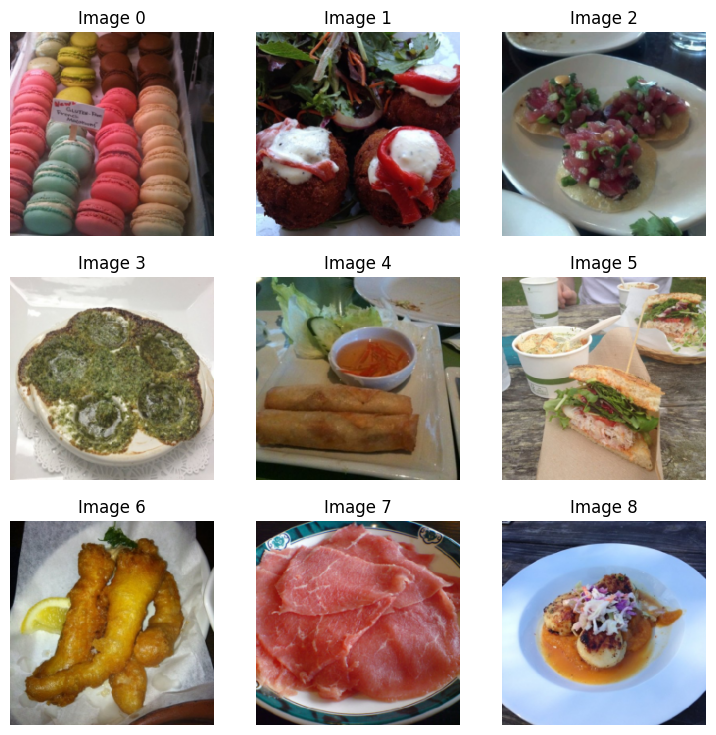

In [32]:
interp = Interpretation.from_learner(learn)
interp.plot_top_losses(9)